In [12]:
import numpy as np
import math
from scipy.stats import norm, gamma, iqr
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [13]:
np.random.seed(1729)

In [14]:
def binomial_probability(N,p,k):

    log_prob = np.log(math.factorial(N))
    log_prob -= np.log(math.factorial(k))
    log_prob -= np.log(math.factorial(N-k))

    log_prob += float(k)*np.log(p)
    log_prob += float(N-k)*np.log(1.0-p)

    return np.exp(log_prob)

def cumulative_binomial_probability(N,p):

    cumulative_probs = np.zeros(N+1)
    cumulative_probs[0] = binomial_probability(N=N, p=p, k=0)
    for i in range(1, N+1):
        cumulative_probs[i] = cumulative_probs[i-1] + binomial_probability(N=N, p=p, k=i)
    return cumulative_probs


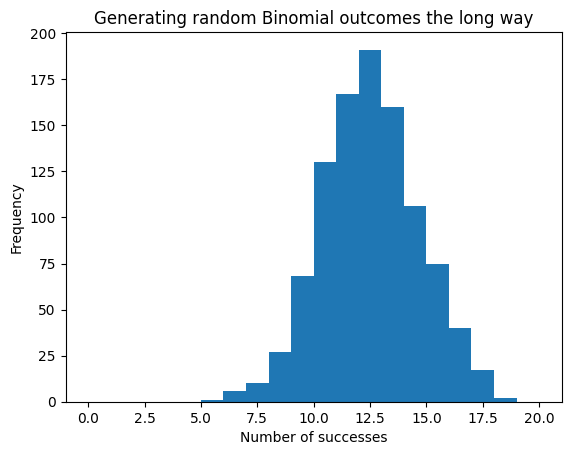

In [15]:
N = 20
p = 0.6

cumulative_probs = cumulative_binomial_probability(N=N,p=p)

n_random = 1000
random_binomial = np.empty(n_random, dtype=np.int8)

for i in range(n_random):

    r_tmp = np.random.rand(1)
    random_binomial[i] = np.where(cumulative_probs - r_tmp > 0)[0][0]

plt.hist(random_binomial, bins=range(0, N+1))
plt.title('Generating random Binomial outcomes the long way')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np

N = 20 
p = 0.6

n_random = 1000

random_binomial2 = np.random.binomial(n=N, p=p, size=n_random)

random_binomial2

array([9])

In [24]:
import numpy as np

n_random = 10000

random_poisson = np.random.poisson(lam=5.2, size=n_random)

random_poisson

array([1, 4, 4, ..., 5, 5, 4], shape=(10000,))

In [26]:
import numpy as np
mean = 2.0
sd = 1.5

n_random = 10000
random_gaussian1 = mean + (sd*np.random.randn(n_random))

random_gaussian2 = np.random.normal(loc=mean, scale=sd, size=n_random)

random_gaussian2

array([3.39888758, 5.65117806, 3.39144563, ..., 3.11010034, 2.00729409,
       0.30943403], shape=(10000,))

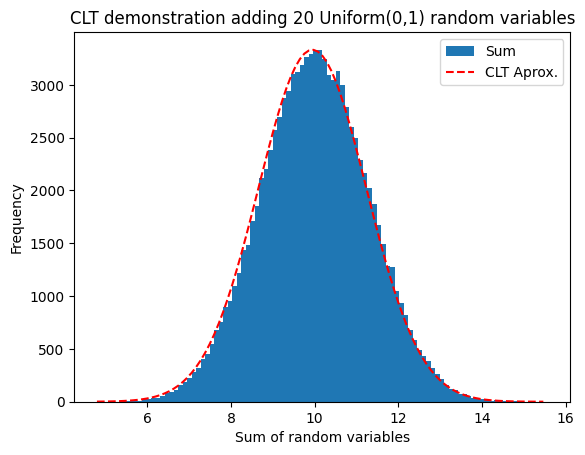

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_random_var = 20 
n_simulations = 100000

total_of_random_vars = np.zeros(n_simulations)

for i in range(n_simulations):
    total_of_random_vars[i] = np.sum(np.random.rand(n_random_var))

plot = plt.hist(total_of_random_vars, bins=100, label='Sum')

mean_CLT = n_random_var * 0.5
var_CLT = n_random_var / 12.0
std_CLT = np.sqrt(var_CLT)

x_values = plot[1]

clt_expected_frequency = np.zeros(len(x_values) - 1)

for i in range(len(x_values) - 1):
    cumulative_prob1 = norm.cdf((x_values[i+1] - mean_CLT) / std_CLT)
    cumulative_prob2 = norm.cdf((x_values[i] - mean_CLT) / std_CLT)
    cumulative_prob_diff = cumulative_prob1 - cumulative_prob2
    clt_expected_frequency[i] = n_simulations * cumulative_prob_diff

plt.plot(x_values[0:-1], clt_expected_frequency, 'r--', label='CLT Aprox.')

plt.legend(loc='upper right')
plt.title('CLT demonstration adding 20 Uniform(0,1) random variables')
plt.xlabel('Sum of random variables')
plt.ylabel('Frequency')
plt.show()

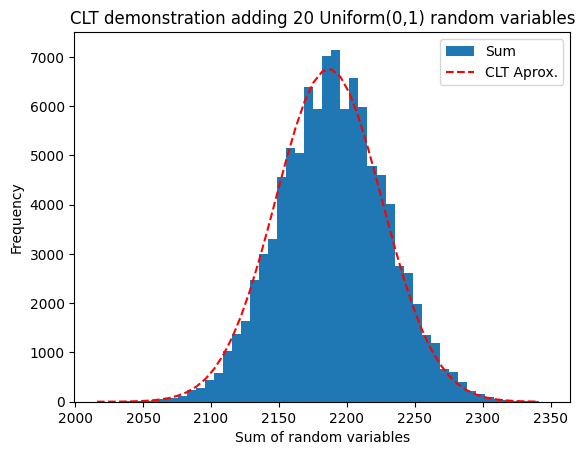

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_days = 365
n_bernoulli_trials = 20
p_success = 0.3
n_simulations = 100000

items_sold_in_period = np.zeros(n_simulations)

for i in range(n_simulations):
    items_sold_in_period[i] = np.sum(np.random.binomial(n_bernoulli_trials, p_success, n_days))

plot = plt.hist(items_sold_in_period, bins=50, label='Sum')

mean_CLT = n_days * n_bernoulli_trials * p_success
var_CLT = n_days * n_bernoulli_trials * p_success * (1.0 - p_success)
std_CLT = np.sqrt(var_CLT)

x_values = plot[1]

clt_expected_frequency = np.zeros(len(x_values) - 1)

for i in range(len(x_values) - 1):
    cumulative_prob1 = norm.cdf((x_values[i+1] - mean_CLT) / std_CLT)
    cumulative_prob2 = norm.cdf((x_values[i] - mean_CLT) / std_CLT)
    cumulative_prob_diff = cumulative_prob1 - cumulative_prob2
    clt_expected_frequency[i] = n_simulations * cumulative_prob_diff

plt.plot(x_values[0:-1], clt_expected_frequency, 'r--', label='CLT Aprox.')

plt.legend(loc='upper right')
plt.title('CLT demonstration adding 20 Uniform(0,1) random variables')
plt.xlabel('Sum of random variables')
plt.ylabel('Frequency')
plt.show()

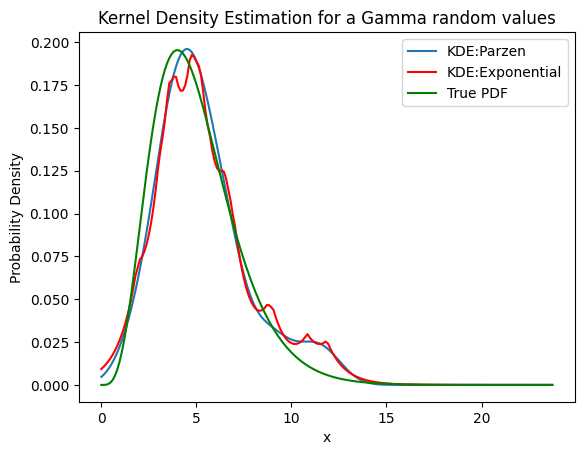

In [7]:
import numpy as np
from scipy.stats import norm, gamma, iqr
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

np.random.seed(280)

shape = 5.0
scale = 1.0
n_sample = 30
x_sample = np.random.gamma(shape=shape, scale=scale, size=(n_sample, 1))

sample_std = np.std(x_sample)
sample_iqr = iqr(x_sample)

parzen_kde = KernelDensity(kernel='gaussian').fit(x_sample)

x = np.linspace(0, 2.0*np.max(x_sample), 200)
log_density_parzen = parzen_kde.score_samples(x.reshape(200, 1))
plt.plot(x, np.exp(log_density_parzen), label='KDE:Parzen')

bandwidth = 0.9*np.min([sample_std, sample_iqr/1.35]) * np.power(float(n_sample), -0.2)
exponential_kde = KernelDensity(kernel='exponential', bandwidth=bandwidth).fit(x_sample)
log_density_exponential = exponential_kde.score_samples(x.reshape(200, 1))
plt.plot(x, np.exp(log_density_exponential), 'red', label='KDE:Exponential')

plt.plot(x, gamma.pdf(x, shape)/scale, 'green', label='True PDF')
plt.legend(loc='upper right')
plt.title('Kernel Density Estimation for a Gamma random values')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()